## Challenge Set 5
Topic: Classification Challenges  
Date: 07/27/2016  
Name: Kevin Cole 

In [2]:
import pandas as pd
%matplotlib inline
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm

## Challenge 1

In [14]:
df = pd.read_csv('../../../challenges_data/house-votes-84.data', header = None)

In [15]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican.
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican.


In [16]:
df = df.replace('y', 1)
df = df.replace('n', 0)

In [17]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1,republican.
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?,republican.


In [19]:
for col in df.columns[df.columns != 16]:
    df[col] = df[col].replace('?', np.mean(df[col][df[col] != '?']))

In [20]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.362319,1.0,1.0,1.0,0.0,1.000000,republican.
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,0.0,0.812689,republican.


In [23]:
df[16] = df[16].str.replace('.', '')

## Challenge 2

In [24]:
from sklearn.cross_validation import train_test_split

y, X = np.ravel(df[[16]]), df.drop([16], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


## Challenge 3

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

score = {}
for i in range(1,21):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    score[i] = accuracy_score(y_test, neigh.predict(X_test))

In [26]:
high = max(score, key=lambda i: score[i])
print(high, score[high])

2 0.926605504587


## Challenges 4

In [27]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_acc = accuracy_score(y_test, log_model.predict(X_test))
print(log_acc)

0.935779816514


## Challenges 5

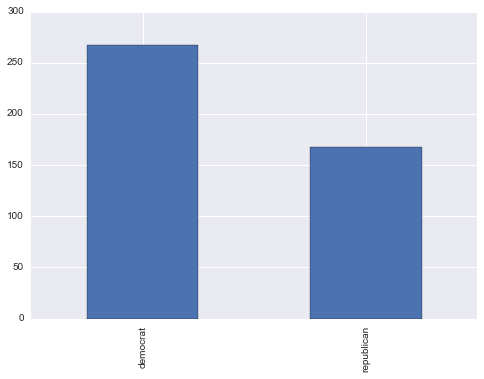

In [29]:
df[16].value_counts().plot(kind='bar')
plt.show()

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

In [30]:
y_predicted = [np.array('democrat') for i in range(len(X))]
dem_pred = accuracy_score(y, y_predicted)
print(dem_pred)

0.613793103448


In [31]:
y_predicted = [np.array('republican') for i in range(len(X))]
rep_pred = accuracy_score(y, y_predicted)
print(rep_pred)

0.386206896552


## Challenge 6

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

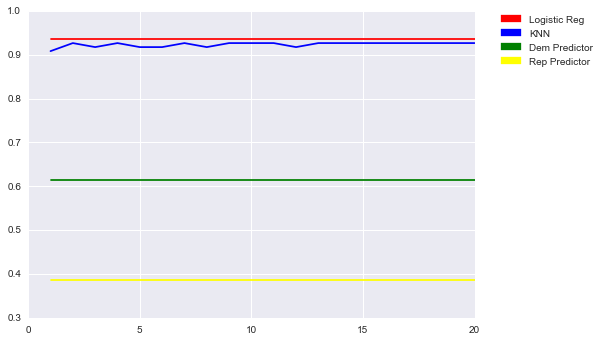

In [32]:
import matplotlib.patches as mpatches

plt.plot(list(score.keys()), list(score.values()), 'blue')
plt.plot(list(range(1,21)), [log_acc for i in range(1,21)], 'red')
plt.plot(list(range(1,21)), [dem_pred for i in range(1,21)], 'green')
plt.plot(list(range(1,21)), [rep_pred for i in range(1,21)], 'yellow')

blue = mpatches.Patch(color='blue', label='KNN')
red = mpatches.Patch(color='red', label='Logistic Reg')
green = mpatches.Patch(color='green', label='Dem Predictor')
yellow = mpatches.Patch(color='yellow', label='Rep Predictor')
plt.legend(handles=[red, blue, green, yellow], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

## Challenge 7

In [34]:
from sklearn.naive_bayes import GaussianNB

Gmodel=GaussianNB()
learning_curve(Gmodel,X,y,train_sizes=[3,6,10],cv=3)

(array([ 3,  6, 10]), array([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]]), array([[ 0.3862069 ,  0.84137931,  0.76551724],
        [ 0.8       ,  0.89655172,  0.90344828],
        [ 0.93793103,  0.79310345,  0.83448276]]))

In [35]:
from sklearn.learning_curve import learning_curve

log_learn = learning_curve(log_model, X, y)

train_cv_err = np.mean(log_learn[1], axis=1)
test_cv_err = np.mean(log_learn[2], axis=1)

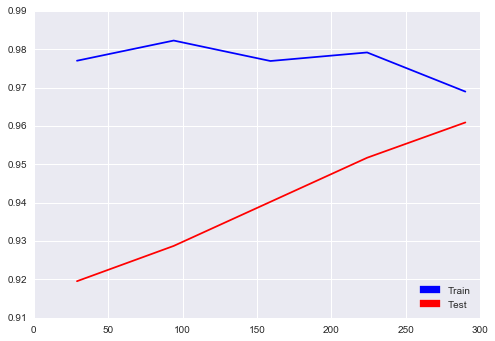

In [36]:
import matplotlib.patches as mpatches

plt.plot(log_learn[0], train_cv_err, 'blue')
plt.plot(log_learn[0], test_cv_err, 'red')

blue = mpatches.Patch(color='blue', label='Train')
red = mpatches.Patch(color='red', label='Test')
plt.legend(handles=[blue, red], loc =4)

plt.show()

In [37]:
best_neigh = KNeighborsClassifier(n_neighbors=6)
neigh_learn = learning_curve(best_neigh, X, y)

train_cv_err = np.mean(neigh_learn[1], axis=1)
test_cv_err = np.mean(neigh_learn[2], axis=1)

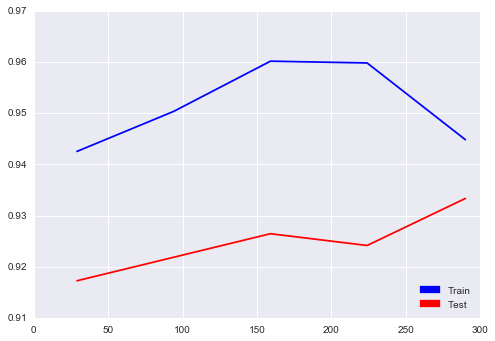

In [38]:
plt.plot(neigh_learn[0], train_cv_err, 'blue')
plt.plot(neigh_learn[0], test_cv_err, 'red')

blue = mpatches.Patch(color='blue', label='Train')
red = mpatches.Patch(color='red', label='Test')
plt.legend(handles=[blue, red], loc =4)

plt.show()

## Challenge 8

In [39]:
from sklearn.naive_bayes import GaussianNB

gaus_model = GaussianNB()
gaus_model.fit(X_train, y_train)
gaus_acc = accuracy_score(y_test, gaus_model.predict(X_test))
print(gaus_acc)

0.926605504587


In [40]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_acc = accuracy_score(y_test, svc_model.predict(X_test))
print(svc_acc)

0.935779816514


In [41]:
from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)
dtc_acc = accuracy_score(y_test, dtc_model.predict(X_test))
print(dtc_acc)

0.935779816514


In [42]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
rfc_acc = accuracy_score(y_test, rfc_model.predict(X_test))
print(rfc_acc)

0.926605504587


## Challenge 9

In [43]:
from sklearn.cross_validation import cross_val_score

gaus_cvs = cross_val_score(gaus_model, X_train, y_train)
np.mean(gaus_cvs)

0.95401517725676743

In [44]:
svc_cvs = cross_val_score(svc_model, X_train, y_train)
np.mean(svc_cvs)

0.95704496545475148

In [45]:
dtc_cvs = cross_val_score(dtc_model, X_train, y_train)
np.mean(dtc_cvs)

0.93875297315664286

In [46]:
rfc_cvs = cross_val_score(rfc_model, X_train, y_train)
np.mean(rfc_cvs)

0.94787065352814592

## Challenge 10

In [74]:
df = pd.read_csv('../../../challenges_data/house-votes-84.data', header = None)
df = df.replace('y', 1)
df = df.replace('n', 0)

In [76]:
from statistics import mode

for col in df.columns[df.columns != 16]:
    df[col] = df[col].replace('?', mode(df[col][df[col] != '?']))

In [49]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1,republican.
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,republican.


In [50]:
y, X = np.ravel(df[[0]]), df.drop([16, 0], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [51]:
X.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1


In [52]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

log_cvs = cross_val_score(log_model, X_train, y_train)
np.mean(log_cvs)

0.69332210998877652

## Challenge 11

In [53]:
movies = pd.read_csv('~/ds/metis/nyc16_ds8/challenges/challenges_data/2013_movies.csv')

In [54]:
movies.head(2)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00


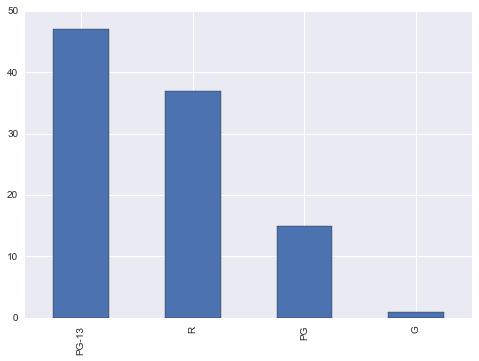

In [55]:
movies['Rating'].value_counts().plot(kind='bar')
plt.show()

In [56]:
#get rid of NaNs

movies = movies.dropna()

y, X = np.ravel(movies[['Rating']]), movies.drop(['Rating', 'Title', 'Director', "ReleaseDate"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [57]:
score = {}
for i in range(1,21):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    score[i] = accuracy_score(y_test, neigh.predict(X_test))
    
high = max(score, key=lambda i: score[i])
print(high, score[high])

4 0.636363636364


In [58]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_acc = accuracy_score(y_test, log_model.predict(X_test))
print(log_acc)

0.681818181818


In [59]:
y_predicted = [np.array('PG-13') for i in range(len(X))]
rep_pred = accuracy_score(y, y_predicted)
print(rep_pred)

0.459770114943


The logistic regression did worse than the baseline, KNN better.

In [60]:
log_model.classes_

array(['PG', 'PG-13', 'R'], dtype=object)

In [61]:
log_model.coef_

array([[ -8.17093026e-09,  -1.83022645e-09,  -1.22853029e-13],
       [  7.15052392e-09,  -4.60723033e-09,  -5.73665853e-14],
       [ -1.59144576e-08,   2.98671499e-09,   1.07899695e-13]])

## Challenge 12

In [63]:
hsd = pd.read_csv('../../../challenges_data/haberman.data', 
                  names=['age', 'year', 'pos_nodes', 'survival'])

In [64]:
hsd.head(2)

,age,year,pos_nodes,survival
0,30,64,1,1
1,30,62,3,1


In [65]:
print(np.mean(hsd.age), np.std(hsd.age))
print(np.mean(hsd.age[hsd.survival ==1]), np.std(hsd.age[hsd.survival ==1]))
print(np.mean(hsd.age[hsd.survival ==2]), np.std(hsd.age[hsd.survival ==2]))


52.45751633986928 10.78578520363183
52.01777777777778 10.98765547510051
53.67901234567901 10.10418219303131


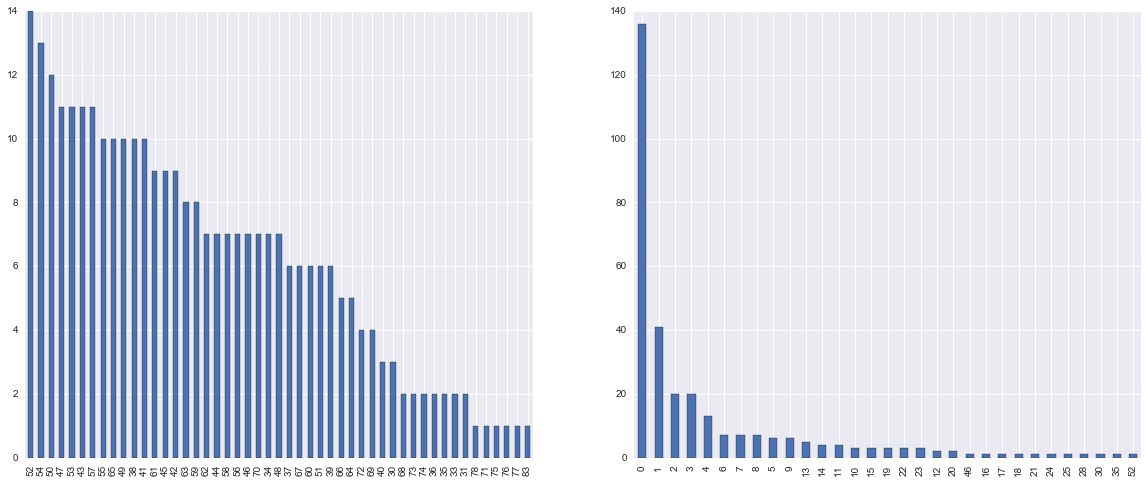

In [66]:
plt.figure(figsize=(20,8))

plt.subplot(121)
hsd['age'].value_counts().plot(kind='bar')

plt.subplot(122)
hsd['pos_nodes'].value_counts().plot(kind='bar')
plt.show()

In [67]:
min(hsd.year)

58

In [68]:
max(hsd.year)

69

In [69]:
y, X = np.ravel(hsd[['survival']]), hsd.drop(['survival'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [70]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_acc = accuracy_score(y_test, log_model.predict(X_test))
print(log_acc)

0.727272727273


In [71]:
log_model.coef_

array([[ 0.01128514, -0.03157267,  0.08661776]])

In [72]:
log_learn = learning_curve(log_model, X, y)

train_cv_err = np.mean(log_learn[1], axis=1)
test_cv_err = np.mean(log_learn[2], axis=1)

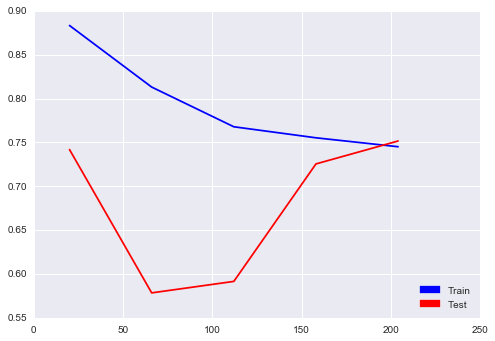

In [73]:
import matplotlib.patches as mpatches

plt.plot(log_learn[0], train_cv_err, 'blue')
plt.plot(log_learn[0], test_cv_err, 'red')

blue = mpatches.Patch(color='blue', label='Train')
red = mpatches.Patch(color='red', label='Test')
plt.legend(handles=[blue, red], loc =4)

plt.show()